In [9]:
import requests
import matplotlib.pyplot as plt
import kaggle
import pandas as pd 
import numpy as np

In [14]:
import requests

# Send a GET request to the API endpoint
response = requests.get('http://127.0.0.1:5000/convert')

if response.status_code == 200:

    data = response.json()
    print(data)
else:
    print(f"Failed to fetch data. Status code: {response.status_code}")

[{'gender': 'female', 'lunch': 'standard', 'math score': '59', 'parental level of education': 'some college', 'race/ethnicity': 'group D', 'reading score': '70', 'test preparation course': 'completed', 'writing score': '78'}, {'gender': 'male', 'lunch': 'standard', 'math score': '96', 'parental level of education': "associate's degree", 'race/ethnicity': 'group D', 'reading score': '93', 'test preparation course': 'none', 'writing score': '87'}, {'gender': 'female', 'lunch': 'free/reduced', 'math score': '57', 'parental level of education': 'some college', 'race/ethnicity': 'group D', 'reading score': '76', 'test preparation course': 'none', 'writing score': '77'}, {'gender': 'male', 'lunch': 'free/reduced', 'math score': '70', 'parental level of education': 'some college', 'race/ethnicity': 'group B', 'reading score': '70', 'test preparation course': 'none', 'writing score': '63'}, {'gender': 'female', 'lunch': 'standard', 'math score': '83', 'parental level of education': "associate'

In [17]:
print(response.json())

[{'gender': 'female', 'lunch': 'standard', 'math score': '59', 'parental level of education': 'some college', 'race/ethnicity': 'group D', 'reading score': '70', 'test preparation course': 'completed', 'writing score': '78'}, {'gender': 'male', 'lunch': 'standard', 'math score': '96', 'parental level of education': "associate's degree", 'race/ethnicity': 'group D', 'reading score': '93', 'test preparation course': 'none', 'writing score': '87'}, {'gender': 'female', 'lunch': 'free/reduced', 'math score': '57', 'parental level of education': 'some college', 'race/ethnicity': 'group D', 'reading score': '76', 'test preparation course': 'none', 'writing score': '77'}, {'gender': 'male', 'lunch': 'free/reduced', 'math score': '70', 'parental level of education': 'some college', 'race/ethnicity': 'group B', 'reading score': '70', 'test preparation course': 'none', 'writing score': '63'}, {'gender': 'female', 'lunch': 'standard', 'math score': '83', 'parental level of education': "associate'

## Basic EDA

In [15]:
df = pd.DataFrame(data)

In [16]:
df

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,female,standard,59,some college,group D,70,completed,78
1,male,standard,96,associate's degree,group D,93,none,87
2,female,free/reduced,57,some college,group D,76,none,77
3,male,free/reduced,70,some college,group B,70,none,63
4,female,standard,83,associate's degree,group D,85,none,86
...,...,...,...,...,...,...,...,...
995,male,standard,77,some college,group C,77,none,71
996,male,standard,80,some college,group C,66,none,66
997,female,standard,67,high school,group A,86,completed,86
998,male,standard,80,high school,group E,72,none,62


In [18]:
def calculate_average_score(row):
    return (row['math score'] + row['reading score'] + row['writing score']) / 3

In [20]:
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')
df['reading score'] = pd.to_numeric(df['reading score'], errors='coerce')
df['writing score'] = pd.to_numeric(df['writing score'], errors='coerce')

In [21]:
df['average score'] = df.apply(calculate_average_score, axis=1)

In [22]:
df.head(3)

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score,average score
0,female,standard,59,some college,group D,70,completed,78,69.0
1,male,standard,96,associate's degree,group D,93,none,87,92.0
2,female,free/reduced,57,some college,group D,76,none,77,70.0


In [23]:
overall_average_math = df['math score'].mean()
overall_average_reading = df['reading score'].mean()
overall_average_writing = df['writing score'].mean()
print(f"Overall Average Math Score: {overall_average_math}")
print(f"Overall Average Reading Score: {overall_average_reading}")
print(f"Overall Average Writing Score: {overall_average_writing}")

Overall Average Math Score: 67.81
Overall Average Reading Score: 70.382
Overall Average Writing Score: 69.14


In [24]:
def plot_bar_chart(df, x_col, y_col, title):
    plt.figure(figsize=(10, 6))
    plt.bar(df[x_col], df[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

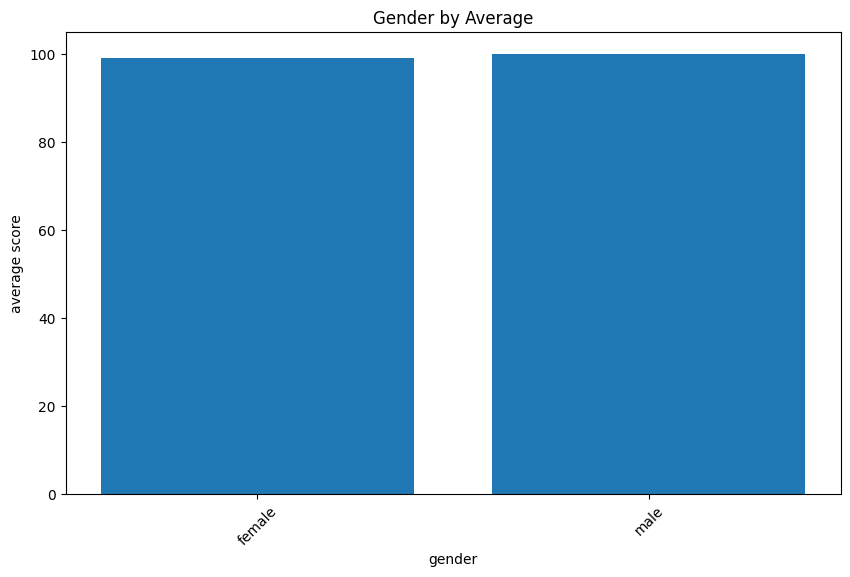

In [25]:
plot_bar_chart(df, 'gender', 'average score', 'Gender by Average')


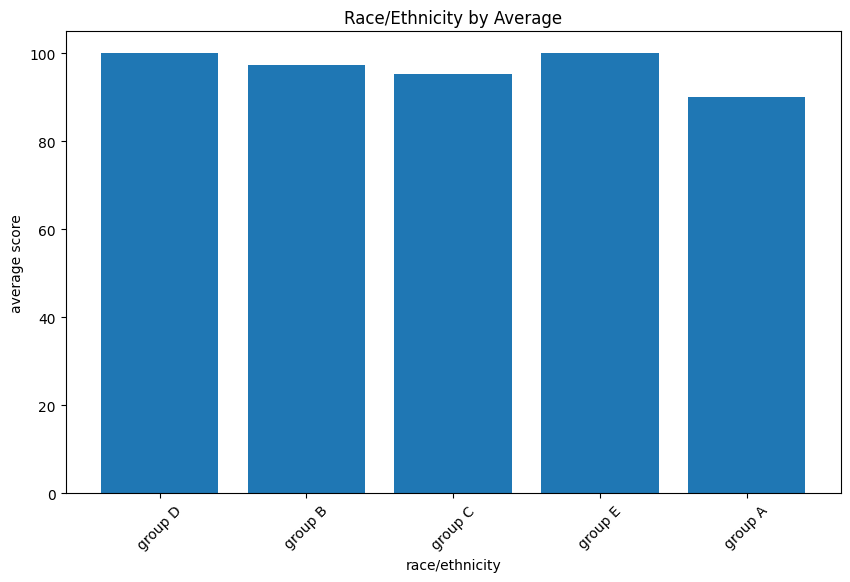

In [26]:
plot_bar_chart(df, 'race/ethnicity', 'average score', 'Race/Ethnicity by Average')


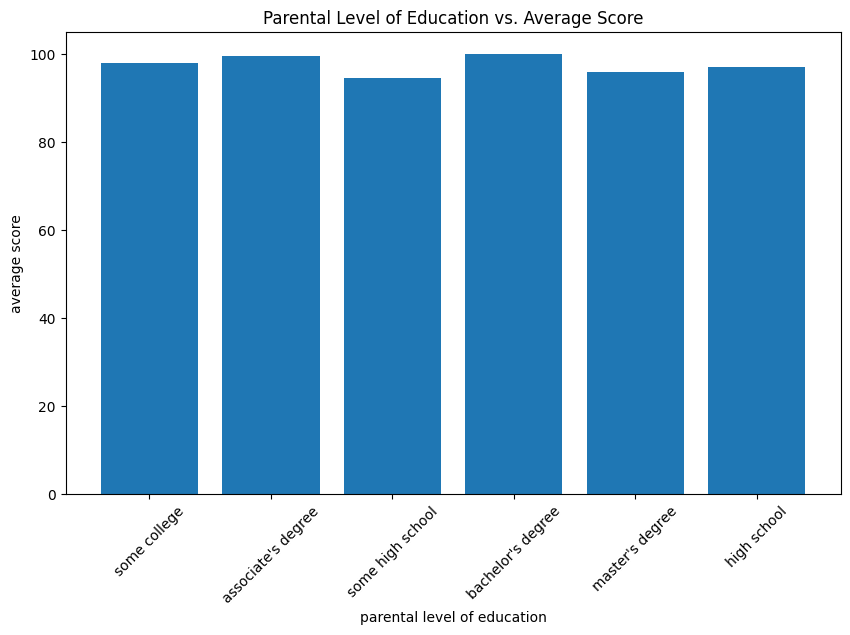

In [27]:
plot_bar_chart(df, 'parental level of education', 'average score', 'Parental Level of Education vs. Average Score')


# Findings
*From the above graph we found out that*
- Males scored a slightly better average than females
- Group E tends to score the highest average among all the other races
- Parental Education with a Bachelors Degree tends to score a higher marks

In [ ]:
d